<h1>File to serve plots and statistics</h1>

In [58]:
import numpy as np

x_test = np.load('test_data_x.npy')
y_test = np.load('test_data_y.npy')

lesion_map = ['Melanocytic nevi',    
               'Melanoma',
              'Benign keratosis-like lesions ',
              'Basal cell carcinoma',
              'Actinic keratoses',
              'Vascular lesions',
              'Dermatofibroma'
              ]

Loading model: unbalanced, 20, 6
Model loaded
predictions generated
Accuracy Score: 0.5992857142857143
loss = 1.5435504111227698
Loading model: unbalanced, 50, 6
Model loaded
predictions generated
Accuracy Score: 0.31785714285714284
loss = 2.7663679568810235
Loading model: 1000, 20, 6
Model loaded
predictions generated
Accuracy Score: 0.7314285714285714
loss = 0.7212896570436004
Loading model: 1500,20,8
Model loaded
predictions generated
Accuracy Score: 0.7392857142857143
loss = 0.7382501396759628
Loading model: 1500, 75, 6
Model loaded
predictions generated
Accuracy Score: 0.8364285714285714
loss = 0.48133162798986184
Loading model: 1500,20, 6  SGD
Model loaded
predictions generated
Accuracy Score: 0.8207142857142857
loss = 0.48097891383833474
Loading model: 1500, 50, 6 SGD
Model loaded
predictions generated
Accuracy Score: 0.9057142857142857
loss = 0.2730225977572651
Loading model: 1500, 75, 6 SGD
Model loaded
predictions generated
Accuracy Score: 0.9364285714285714
loss = 0.19911385

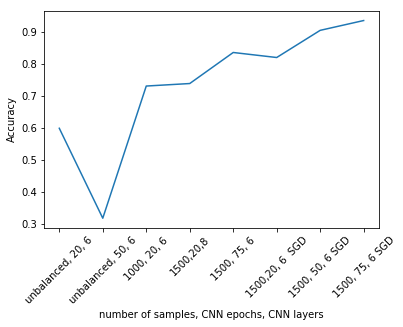

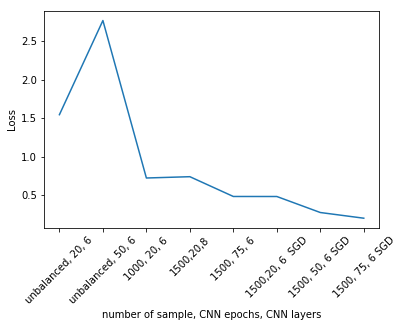

In [69]:
from keras.models import load_model
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss


models = [['unbalanced, 20, 6','backups/initial_model.h5'],
          ['unbalanced, 50, 6','backups/initial_model_50.h5'],
          ['1000, 20, 6','backups/model_1000samples_20_3layers.h5'],
          ['1500,20,8','backups/model_1500samples_20layers_4.h5'],
          ['1500, 75, 6', 'backups/model_1500samples_75.h5'], 
          ['1500,20, 6  SGD','model_1500samples_20_keras_SGD.h5'],
          ['1500, 50, 6 SGD', 'model_1500samples_50_keras_SGD.h5'],
          ['1500, 75, 6 SGD', 'model_1500samples_75_keras_SGD.h5']
          
         ]
mdlist = []
acclist = []
losslist = []
for model in models:
    print("Loading model: " + model[0])
    md = load_model(model[1])
    print("Model loaded")
    predictions = md.predict(x_test)
    print("predictions generated")
    
    
    y_pred = np.argmax(predictions, axis=1)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy Score: " + str(acc))
    #predloss = model.predict_proba(x_test)

    loss = log_loss(y_test, predictions)
    print("loss = " + str(loss))
    losslist.append(loss)
    mdlist.append(model[0])
    acclist.append(acc)
    
plt.xticks(rotation=45)
plt.plot(mdlist,acclist)
plt.xlabel("number of samples, CNN epochs, CNN layers")
plt.ylabel("Accuracy")
plt.show()    
          
plt.xticks(rotation=45)
plt.plot(mdlist,losslist)
plt.xlabel("number of sample, CNN epochs, CNN layers")
plt.ylabel("Loss")
plt.show()     

<h1> Test a Single Image</h1>

In [87]:
from PIL import Image
md = load_model('model_1500samples_75_keras_SGD.h5')

highest probable diagnosis are:
1,Melanoma with probability: 0.99354726
0,Melanocytic nevi with probability: 0.006087506
2, Benign keratosis-like lesions  with probability: 0.00018058954
Actual Class: 1.0, Melanoma


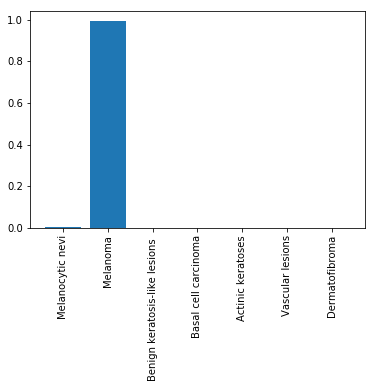

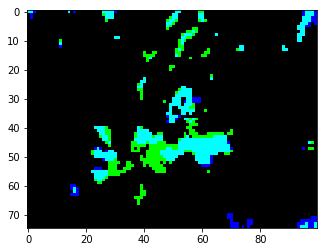

In [116]:
testindex = 1399

x= x_test[testindex].reshape(1,75,100,3)

testimg = Image.fromarray(x_test[testindex].astype(np.uint8))

testimg.save("test.png")




prds = md.predict(x)

y_pred = np.argmax(prds)

cases = np.argsort(prds)
#print(cases)
print("highest probable diagnosis are:")
prob1 = cases[0][6]
prob2 = cases[0][5]
prob3 = cases[0][4]
print(str(prob1) + ","+ str(lesion_map[prob1])  +" with probability: "+ str(prds[0][prob1]))
print(str(prob2) + ","+ str(lesion_map[prob2])  +  " with probability: "+ str(prds[0][prob2]))
print(str(prob3) + ", "+ str(lesion_map[prob3])  +  " with probability: "+ str(prds[0][prob3]))

print("Actual Class: " +str(y_test[testindex]) + ", " + str(lesion_map[int(y_test[testindex])]) )


plt.xticks(rotation=90)
plt.bar(lesion_map, prds[0])
plt.show()
plt.imshow(Image.fromarray(x_test[testindex].astype(np.uint8)))